In [1]:
from chesslab.agent_tf import agent
from chesslab.agent_stockfish import agent as s_agent
from chesslab.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_3():

    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,12,32),dtype=np.float32),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32,dtype=np.float32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64),dtype=np.float32),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64,dtype=np.float32),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128),dtype=np.float32),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128,dtype=np.float32),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256),dtype=np.float32),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256,dtype=np.float32),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes),dtype=np.float32),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes,dtype=np.float32),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 12])

        layer=0
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.relu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_3()

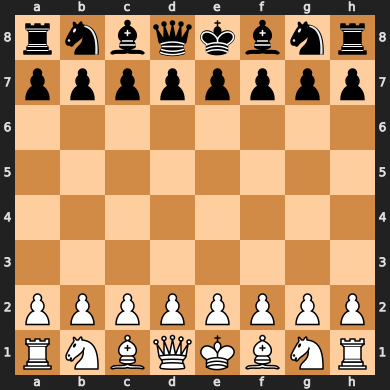

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/tf_weights-relu-full.1.{}.h5'
deepbot = agent(model,base_name.format(1))
move=deepbot.select_move(board)
move

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Move.from_uci('e2e4')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.59992117, 0.59959376, 0.59722626, 0.59608114, 0.6051922 ,
       0.60041124, 0.554162  , 0.5975661 , 0.5778082 , 0.5832534 ,
       0.5894706 , 0.586085  , 0.6198047 , 0.5514786 , 0.55238485,
       0.6562639 , 0.6483007 , 0.63387084, 0.62193346, 0.5926623 ],
      dtype=float32)

In [8]:
from chesslab.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('e2e4'), 0.6562638878822327],
       [Move.from_uci('d2d4'), 0.6483007073402405],
       [Move.from_uci('c2c4'), 0.6338708400726318],
       [Move.from_uci('b2b4'), 0.6219334602355957],
       [Move.from_uci('h2h4'), 0.6198046803474426],
       [Move.from_uci('h2h3'), 0.6051921844482422],
       [Move.from_uci('g2g3'), 0.6004112362861633],
       [Move.from_uci('g1h3'), 0.5999211668968201],
       [Move.from_uci('g1f3'), 0.5995937585830688],
       [Move.from_uci('e2e3'), 0.5975661277770996],
       [Move.from_uci('b1c3'), 0.5972262620925903],
       [Move.from_uci('b1a3'), 0.5960811376571655],
       [Move.from_uci('a2a4'), 0.5926622748374939],
       [Move.from_uci('b2b3'), 0.589470624923706],
       [Move.from_uci('a2a3'), 0.5860850214958191],
       [Move.from_uci('c2c3'), 0.5832533836364746],
       [Move.from_uci('d2d3'), 0.5778082013130188],
       [Move.from_uci('f2f3'), 0.5541620254516602],
       [Move.from_uci('f2f4'), 0.5523848533630371],
       [Move.

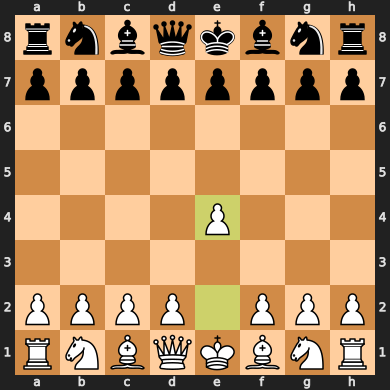

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.24

In [11]:
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Accuracy: 6/25 = 0.24 | weighted = 0.74
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 3 & 48 & 0.9574 & 0.6628 & b4e7 & 0.8058  \\
02 & f5d4 & 24 & 39 & 0.3947 & 0.8493 & a5a3 & 0.9571  \\
03 & e1d1 & 19 & 38 & 0.5135 & 0.5197 & f2f7 & 0.9308  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.9543 & b1b2 & 0.9543  \\
05 & g5c1 & 26 & 48 & 0.4681 & 0.2629 & c8c3 & 0.6831  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.6271 & a3a2 & 0.6271  \\
07 & b7e4 & 1 & 33 & 1.0000 & 0.4146 & b7e4 & 0.4146  \\
08 & h7h6 & 20 & 39 & 0.5000 & 0.0882 & e1c1 & 0.7203  \\
09 & f3e2 & 4 & 35 & 0.9118 & 0.7383 & f3d1 & 0.7915  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.9384 & c7c3 & 0.9451  \\
11 & g3f5 & 10 & 35 & 0.7353 & 0.9221 & d7d8 & 0.9812  \\
12 & c6d6 & 14 & 41 & 0.6750 & 0.0261 & c6c7 & 0.0441  \\
13 & c3d5 & 1 & 30 & 1.0000 & 0.9858 & c3d5 & 0.9858  \\
14 & b1b2 & 42 & 49 & 0.1458 & 0.7371 & d3g6 & 0.9725  \\
15 & d3f5 & 2 & 51 & 0.9800 & 0.8616 & g3f5 & 0.9168  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.6763 & 

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.662797,b4e7,0.805760,3,48,0.957447
1,f5d4,0.849315,a5a3,0.957100,24,39,0.394737
2,e1d1,0.519744,f2f7,0.930755,19,38,0.513514
3,b1b2,0.954295,b1b2,0.954295,1,47,1.000000
4,g5c1,0.262898,c8c3,0.683069,26,48,0.468085
5,a3a2,0.627105,a3a2,0.627105,1,31,1.000000
6,b7e4,0.414625,b7e4,0.414625,1,33,1.000000
7,h7h6,0.088200,e1c1,0.720329,20,39,0.500000
8,f3e2,0.738258,f3d1,0.791463,4,35,0.911765
9,d5c3,0.938354,c7c3,0.945058,2,41,0.975000


In [12]:
epochs=30
exact_acc = np.zeros(epochs)
weighted_acc = np.zeros(epochs)
train_acc_model = np.zeros(epochs)
test_acc_model = np.zeros(epochs)
for i in range(1,epochs+1):
    deepbot = agent(model,base_name.format(i))
    acc,acc_w,_  = kaufman_test(deepbot,details=1)
    exact_acc[i-1]=acc
    weighted_acc[i-1]=acc_w
    train_acc_model[i-1] = deepbot.history['train']['acc'][-1]
    test_acc_model[i-1] = deepbot.history['test']['acc'][-1]


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GP

In [13]:
path = 'E:/database/stockfish_14.exe'
stockfish = s_agent(path)
ss,ssp,_  = kaufman_test(stockfish,details=1)
print("Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada\n {} | {:.2f}".format(ss,ssp))
ss = np.repeat(ss,epochs)
ssp = np.repeat(ssp,epochs)

Exactitud para función de stockfish usando prueba de Kaufman y prueba de Kaufman ponderada
 0.24 | 0.61


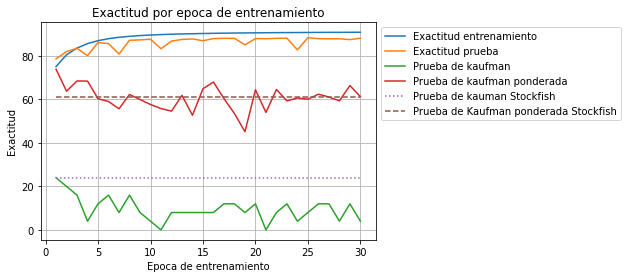

In [14]:
x = np.arange(epochs)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,weighted_acc*100)
plt.plot(x,ss*100,linestyle='dotted')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Exactitud por epoca de entrenamiento')
plt.xlabel('Epoca de entrenamiento')
plt.ylabel('Exactitud')
plt.legend(['Exactitud entrenamiento','Exactitud prueba','Prueba de kaufman','Prueba de kaufman ponderada','Prueba de kauman Stockfish','Prueba de Kaufman ponderada Stockfish'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [15]:
train_acc_model

array([0.75122577, 0.80544811, 0.8361637 , 0.85681742, 0.8703258 ,
       0.87947232, 0.8857553 , 0.89027071, 0.89368904, 0.8962732 ,
       0.8983174 , 0.89995527, 0.90122241, 0.90231162, 0.90328962,
       0.90405309, 0.90475971, 0.9054684 , 0.90588826, 0.90635735,
       0.9068296 , 0.90722162, 0.90748936, 0.9077605 , 0.9081043 ,
       0.90833205, 0.90857673, 0.9086625 , 0.90891206, 0.90908498])

In [16]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(epochs):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*weighted_acc[i]))
data = np.stack((train_acc_model,test_acc_model,exact_acc,weighted_acc),axis=1)
pd.DataFrame(data,index=x,columns=["Conjunto de entrenamiento","Conjunto de prueba","Prueba de kaufman","Prueba de kaufman ponderada"])

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 75.12 & 78.72 & 24.00 & 73.92 \\
02 & 80.54 & 82.00 & 20.00 & 63.79 \\
03 & 83.62 & 83.51 & 16.00 & 68.51 \\
04 & 85.68 & 80.14 & 4.00 & 68.44 \\
05 & 87.03 & 86.19 & 12.00 & 60.32 \\
06 & 87.95 & 85.67 & 16.00 & 59.06 \\
07 & 88.58 & 80.89 & 8.00 & 55.71 \\
08 & 89.03 & 87.22 & 16.00 & 62.29 \\
09 & 89.37 & 87.38 & 8.00 & 59.96 \\
10 & 89.63 & 87.68 & 4.00 & 57.69 \\
11 & 89.83 & 83.35 & 0.00 & 55.81 \\
12 & 90.00 & 86.83 & 8.00 & 54.63 \\
13 & 90.12 & 87.60 & 8.00 & 61.87 \\
14 & 90.23 & 87.84 & 8.00 & 52.74 \\
15 & 90.33 & 87.00 & 8.00 & 64.92 \\
16 & 90.41 & 87.99 & 8.00 & 68.01 \\
17 & 90.48 & 88.11 & 12.00 & 60.38 \\
18 & 90.55 & 88.11 & 12.00 & 53.51 \\
19 & 90.59 & 85.11 & 8.00 & 45.16 \\
20 & 90.64 & 88.01 & 12.00 & 64.43 \\
21 & 90.68 & 87.94 & 0.00 & 54.04 \\
22 & 90.72 & 88.10 & 8.00 & 64.58 \\
23 & 90.75 & 88.15 & 12.00 & 59.34 \\
24 & 90.78 & 82.82 

,Conjunto de entrenamiento,Conjunto de prueba,Prueba de kaufman,Prueba de kaufman ponderada
1,0.751226,0.787183,0.24,0.739173
2,0.805448,0.820046,0.20,0.637926
3,0.836164,0.835130,0.16,0.685088
4,0.856817,0.801419,0.04,0.684386
5,0.870326,0.861915,0.12,0.603219
6,0.879472,0.856721,0.16,0.590646
7,0.885755,0.808906,0.08,0.557087
8,0.890271,0.872214,0.16,0.622913
9,0.893689,0.873847,0.08,0.599629
10,0.896273,0.876840,0.04,0.576871
